For video tutorial, go to https://youtu.be/KTeVOb8gaD4?list=PLQVvvaa0QuDd0flgGphKCej-9jp-QdzZ3

###Basic Setup and Test - Character Recognition

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

In [2]:
digits = datasets.load_digits()
digits.data.shape

(1797, 64)

In [38]:
clf = svm.SVC(C = 100, gamma = 0.001)

In [39]:
X,y = digits.data[:-1], digits.target[:-1]
# The last instance is held out for testing
clf.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

Prediction: [8]


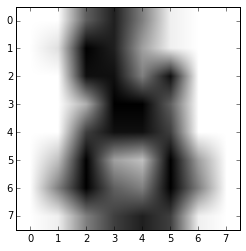

In [40]:
print('Prediction:',clf.predict(digits.data[-1]))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)

In [41]:
X_train,y_train = digits.data[:-10], digits.target[:-10]
clf.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [42]:
X_test,y_test = digits.data[-10:], digits.target[-10:]
clf.predict(X_test)

array([5, 4, 8, 8, 4, 9, 0, 8, 9, 8])

In [43]:
print(y_test)

[5 4 8 8 4 9 0 8 9 8]


In [44]:
np.mean(clf.predict(X_test) == y_test)

1.0

##Obtaining data

If you scrape super fast, the company might sue you for doing DoS attack. So, be careful. Even ask the company for data

Important Features  
P/E Ratio - Price to earnings ratio  
Debt to Equity Ratio  
Stock price

Import the data

In [63]:
import pandas as pd
import os
import time
from datetime import datetime

In [81]:
path ='IntraQuarter'
def Key_Stats(gather='Total Debt/Equity (mrq)'):
    statspath = path+'/_KeyStats'
    stock_list = [x[0] for x in os.walk(statspath)]
    df = pd.DataFrame(columns = ['Date','Unix','Ticker','DE Ratio'])
    for each_dir in stock_list[1:]:
        each_file = os.listdir(each_dir)
        ticker = each_dir.split('/')[2]
        if len(each_file) > 0:
            for file in each_file:
                date_stamp = datetime.strptime(file,'%Y%m%d%H%M%S.html')
                unix_time = time.mktime(date_stamp.timetuple())
                source = open(each_dir+'/'+file).read()
                try:
                    value = float(source.split(gather+':</td><td class="yfnc_tabledata1">')[1].split('</td>')[0])
                    df = df.append({'Date':date_stamp, 'Unix':unix_time, 'Ticker':ticker, 'DE Ratio':value}, ignore_index = True)
                except Exception as e:
                    pass
                
                #print(ticker,':',value)
    save = gather.replace('/','').replace(' ','').replace(')','').replace('(','')+('.csv')
    print(save)
    df.to_csv(save)
Key_Stats()

TotalDebtEquitymrq.csv


In [82]:
df1 = pd.DataFrame(columns=['a','b'])
df1 = df1.append({'a':1,'b':2})
df1

TypeError: Can only append a Series if ignore_index=True

In [57]:
print([x[0] for x in os.walk(path+'/_KeyStats')])

['IntraQuarter/_KeyStats', 'IntraQuarter/_KeyStats/a', 'IntraQuarter/_KeyStats/aa', 'IntraQuarter/_KeyStats/aapl', 'IntraQuarter/_KeyStats/abbv', 'IntraQuarter/_KeyStats/abc', 'IntraQuarter/_KeyStats/abt', 'IntraQuarter/_KeyStats/ace', 'IntraQuarter/_KeyStats/aci', 'IntraQuarter/_KeyStats/acn', 'IntraQuarter/_KeyStats/act', 'IntraQuarter/_KeyStats/adbe', 'IntraQuarter/_KeyStats/adi', 'IntraQuarter/_KeyStats/adm', 'IntraQuarter/_KeyStats/adp', 'IntraQuarter/_KeyStats/adsk', 'IntraQuarter/_KeyStats/adt', 'IntraQuarter/_KeyStats/aee', 'IntraQuarter/_KeyStats/aeo', 'IntraQuarter/_KeyStats/aep', 'IntraQuarter/_KeyStats/aes', 'IntraQuarter/_KeyStats/aet', 'IntraQuarter/_KeyStats/afl', 'IntraQuarter/_KeyStats/agn', 'IntraQuarter/_KeyStats/aig', 'IntraQuarter/_KeyStats/aiv', 'IntraQuarter/_KeyStats/aiz', 'IntraQuarter/_KeyStats/akam', 'IntraQuarter/_KeyStats/all', 'IntraQuarter/_KeyStats/altr', 'IntraQuarter/_KeyStats/alxn', 'IntraQuarter/_KeyStats/amat', 'IntraQuarter/_KeyStats/amd', 'IntraQu

In [58]:
open('IntraQuarter/_KeyStats/aa/20040413042010.html').read()

'<html><head>\n\n\n<!-- Start Wayback Rewrite JS Include -->\n<script type="text/javascript" src="/static/js/jwplayer/jwplayer.js" ></script>\n<script type="text/javascript" src="/static/js/video-embed-rewriter.js"></script>\n<script type="text/javascript">\nfunction initYTVideo(id)\n{\n\t_wmVideos_.init("/web/", id);\n}\n</script>\n<!-- End Wayback Rewrite JS Include -->\n<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1"><title>AA: Key Statistics for ALCOA INC - Yahoo! Finance</title><script type="text/javascript" src="/web/20040413042010js_/http://us.i1.yimg.com/us.yimg.com/i/us/fi/03rd/yg_csstare_nobgcolor.js"></script><link rel="stylesheet" href="/web/20040413042010cs_/http://us.i1.yimg.com/us.yimg.com/i/us/fi/03rd/yfnc2.css" type="text/css" media="screen"><style media="screen">\n\nbody {\ntext-align:center;\n}\ndiv#screen {\nwidth: 752px;\nborder: 1px solid #fff;\nmargin: auto;\n}\n#leftcol {\nborder: 1px solid #fff;\nwidth: 155px;\ntext-align: left;\nfloat: 